In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt

RTT 1:	 11
RTT 2:	 12
RTT 3:	 13
RTT 4:	 14
RTT 5:	 4
RTT 6:	 5
RTT 7:	 6
RTT 8:	 7
RTT 9:	 8
RTT 10:	 2
RTT 11:	 3
RTT 12:	 4
RTT 13:	 5
RTT 14:	 6
RTT 15:	 1
RTT 16:	 2
RTT 17:	 3
RTT 18:	 4
RTT 19:	 5
RTT 20:	 1
RTT 21:	 2
RTT 22:	 3
RTT 23:	 4
RTT 24:	 5
RTT 25:	 1
RTT 26:	 2
RTT 27:	 3
RTT 28:	 4
RTT 29:	 5
RTT 30:	 1
RTT 31:	 2
RTT 32:	 3
RTT 33:	 4
RTT 34:	 5
RTT 35:	 1
RTT 36:	 2
RTT 37:	 3
RTT 38:	 4
RTT 39:	 5
RTT 40:	 1
RTT 41:	 2
RTT 42:	 3
RTT 43:	 4
RTT 44:	 5
RTT 45:	 1
RTT 46:	 2
RTT 47:	 3
RTT 48:	 4
RTT 49:	 5
RTT 50:	 1


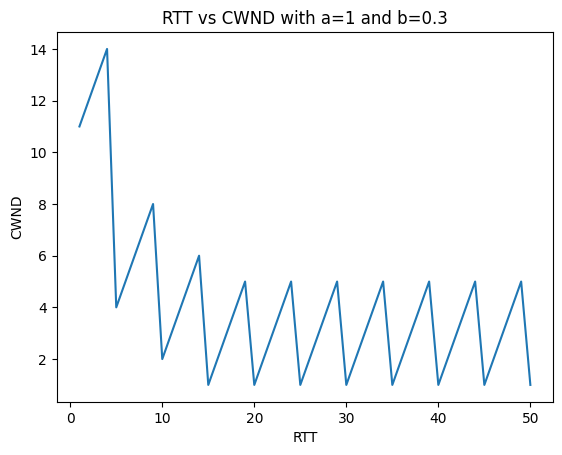

In [4]:
def AIMD(a:int=1, b:float=0.5, cwnd:int=10, data_packet:tuple=(None, "Dropped"), RTT_tracker:list=[])->list:
    """This function mimics the Additive Increase and Multiplicative Decrease Mechanism in TCP Congestion Control.
 
    Parameters
    ----------
    a: int-type
    This constant controls the rate of Additive Increase. This optimises the efficiency of the network.
    
    b: float-type
    This constant controls the rate of Multiplicative Decrease. This optimises the fairness of the network.
    This value is between 0 (exclusive) and alpha (exclusive).
    
    With these two parameters, the network system converges to optimal network conditions where the fairness line intersects with the 
    efficiency line.
    
    cwnd: int-type
    This denotes the current window size.
    
    data_packet: tuple-type
    This represents the data packet to be transferred through the network.
    
    RTT_tracker: list-type
    This tracks the RTT to cwnd size.
    
    Returns
    -------
    cwnd load
    """
    _, status = data_packet
    
    if status == 'Transfer':
        cwnd += a
    else:
        cwnd = math.floor(cwnd * b)
        
    RTT_tracker.append(cwnd)
    
    return cwnd
        
# Set Up for Data
data_packets = [(x, "Transfer") if x % 5 != 0 else (x, "Dropped") for x in range(1, 51)]

# Parameters
cwnd = 10
a = 1
b = 0.3

# Iterate
RTT_tracker = []
for data_packet in data_packets:
    cwnd = AIMD(a, b, cwnd, data_packet, RTT_tracker)

# Visualise
x, y = [], []
for idx, cwnd in enumerate(RTT_tracker):
    print(f"RTT {idx + 1}:\t", cwnd)
    x.append(idx + 1)
    y.append(cwnd)

plt.plot(x, y)
plt.xlabel("RTT")
plt.ylabel("CWND")
plt.title(f"RTT vs CWND with a={a} and b={b}")
plt.show()

In [57]:
ITERATESMAX = 100 # You can adjust this value as needed
C = 10 # Adjust C value as needed
alpha = 1 # Adjust alpha value as needed
beta = 0.5
exponent1 = beta # Adjust exponent1 value as needed
exponent2 = beta # Adjust exponent2 value as needed
x1 = 2
x2 = 8
alpha1 = alpha
alpha2 = alpha
x1_values = np.zeros(ITERATESMAX)
x2_values = np.zeros(ITERATESMAX)
x1_values[0] = x1
x2_values[0] = x2

for i in range(1, ITERATESMAX):
   # if (x1 + x2 <= C + alpha1 + alpha2): # when alpha is large it pushes the const boundary out
   if (x1 + x2 <= C):
   # Additive increase phase
      print('Additive I')
      alpha1 = alpha #* np.power(x1, exponent1)
      alpha2 = alpha #* np.log(x2 + 1)
      x1 = x1 + alpha1
      x2 = x2 + alpha2
   else:
      # Simulate network condition (for example, congestion)
      print('Multiplicative D')
      beta1 = exponent1
      beta2 = exponent2
      x1 = math.floor(x1 * beta1)
      x2 = math.floor(x2 * beta2)

   # pause(1)
   # Store values in arrays
   x1_values[i] = x1
   x2_values[i] = x2
# Display the final values
print("Final x1:", x1)
print("Final x2:", x2)

Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I
Additive I
Multiplicative D
Additive I
Additive I


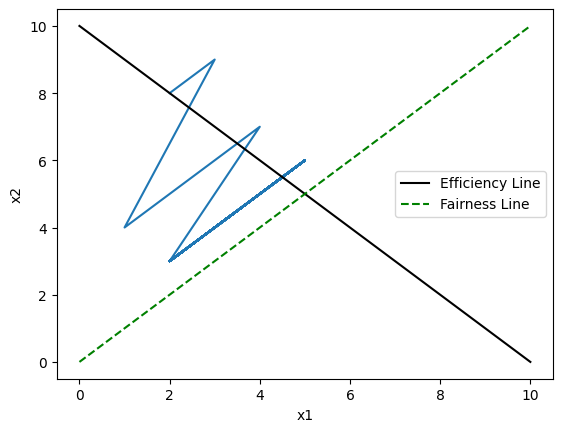

In [58]:
plt.plot(x1_values, x2_values)
plt.plot([0, 10], [10, 0], 'k-', label='Efficiency Line')
plt.plot([0, 10], [0, 10], 'g',linestyle='dashed', label='Fairness Line')
plt.xlabel("x1")
plt.ylabel("x2")

plt.legend()
plt.show()